In [1]:
# read excel
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

df = pd.read_excel('~/Downloads/sample - arch prospecting.xlsx', sheet_name='sample arch list')

df

,License #,Business Name,First Name,Last Name,Source ref,XXXprojectXXX,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25568.0,"BKSK ARCHITECTS, LLP",TODD,POISSON,https://archpaper.com/2019/11/bksk-and-burohap...,glass shell at Tammany Hall,Example
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14980.0,LALIRE MARCH ARCHITECTS LLP,REX,LALIRE,[to complete[,[to complete[,To complete in test
4,26814.0,"DESIGN AIDD ARCHITECTURE, DPC",ANDREA,HARRIS,[to complete[,[to complete[,To complete in test
5,12394.0,ARCOLOGICA ARCHITECTURE,JORGE,SOSA,[to complete[,[to complete[,To complete in test
6,22510.0,LEESER ARCHITECTURE PLLC,THOMAS,LEESER,[to complete[,[to complete[,To complete in test
7,23295.0,ROSENBAUM DESIGN GROUP,RAND,ROSENBAUM,[to complete[,[to complete[,To complete in test
8,24832.0,"BUILDING STUDIO ARCHITECTS, LLP",JOHN,FIELD,[to complete[,[to complete[,To complete in test
9,15011.0,MICHAEL MUROFF ARCHITECT DPC,MICHAEL,MUROFF,[to complete[,[to complete[,To complete in test


In [2]:
# read architect in row i
i = 1
license = df['License #'][i]
business = df['Business Name'][i]
firstName = df['First Name'][i]
lastName = df['Last Name'][i]

[google news scraping](https://stackoverflow.com/questions/15550655/web-scraping-google-news-with-python)

In [22]:
query = "%20".join([firstName, lastName, "architect"])
searchURL = f'https://www.google.com/search?pz=1&cf=all&ned=us&hl=en&tbm=nws&gl=us&as_q={query}'

<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><meta content="origin" name="referrer"><title>TODD POISSON architect - Google Search</title><script nonce="EPWHiSJflsQk3yxJgL+3zg==">(function(){window.google={kEI:'qOi9XtWjBIqS6AS7hruICQ',kEXPI:'0,202123,3,4,1151616,5663,730,224,5104,207,1245,1959,10,1051,175,364,1499,239,337,241,383,246,5,960,169,225,218,188,148,127,15,117,225,656,1217,406,409,3,160,395,1123482,1197780,111,258,65,13,329040,1294,7105,180,3382,1716,1604,2044,314,893,633,1770,1137,4795,5298,2488,328,5033,10931,279,1191,14056,861,7055,2445,2646,793,845,4693,10213,1258,7930,3961,1800,512,2111,4858,1362,283,9008,447,2582,2815,1923,11033,1808,4020,978,4788,1,3142,5297,2054,623,297,873,1217,2559,6846,1142,2792,448,12,866,12,5,7,3309,2713,3222,4516,2778,520,399,2277,9,442,2353,62,156,671,704,1279,2212,530,149,1103,840,517,1466,56,1304,295
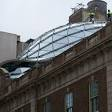
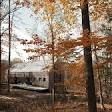
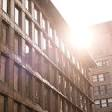

In [26]:
import requests
import bs4

# anti-scraping
userAgent = "Mozilla/5.0 (Windows NT 10.0; WOW64; rv:68.0) Gecko/20100101 Firefox/68.0"
response = requests.get(url, headers={'User-Agent': userAgent})
if response.status_code == 200:
    print(response.content.decode('utf-8'))
else:
    print(f"Fail to get the url [{response.status_code}]")

In [37]:
# parsing
soup = bs4.BeautifulSoup(response.content.decode('utf-8'), 'html.parser')
# snippet = [a.text for a in soup.find_all('div', class_="Y3v8qd")]
links = [a['href'] for a in soup.find_all('a', href=True)]

In [81]:
import re

# clean links
pattern = r'^https://\w+\.(?!google).\S+'
newsLinks = [re.findall(pattern, a)[0] for a in links if re.findall(pattern, a)]

In [17]:
soup.find_all('a')

[<a class="gyPpGe" data-ved="0ahUKEwjIi7Pp0bTpAhURFpoKHd-aA38Q67oDCAQ" jsaction="i3viod" jsname="BKxS1e" role="link" tabindex="0">Skip to main content</a>,
 <a class="gyPpGe" href="https://support.google.com/websearch/answer/181196?hl=en" jsname="KI37ad" onmousedown="return rwt(this,'','','','','AOvVaw3elFYWr3XjJhjNYthIzFcp','','0ahUKEwjIi7Pp0bTpAhURFpoKHd-aA38QwcMDCAU','','',event)">Accessibility help</a>,
 <a class="gyPpGe" data-async-trigger="duf3-78" jsaction="async.u" jsname="JUypV" role="link" tabindex="0">Accessibility feedback</a>,
 <a href="/search?q=TODD+POISSON+architect&amp;tbm=nws&amp;hl=en&amp;gl=us&amp;gbv=1&amp;sei=5eW9XoiFDZGs6ATftY74Bw">here</a>,
 <a aria-expanded="false" aria-label="Google apps" class="gb_D" href="https://www.google.com/intl/en/about/products?tab=nh" role="button" tabindex="0"><svg class="gb_5e" focusable="false" viewbox="0 0 24 24"><path d="M6,8c1.1,0 2,-0.9 2,-2s-0.9,-2 -2,-2 -2,0.9 -2,2 0.9,2 2,2zM12,20c1.1,0 2,-0.9 2,-2s-0.9,-2 -2,-2 -2,0.9 -2,2 